# Пакеты прикладных программ, задание №1

Три частицы, каждая массой $ m $, связанные пружинками жёсткости $ k $, могут двигаться по кольцу. Считать, что движение по кольцу происходит без трения, кольцо расположено в горизонтальной плоскости, а в положении равновесия пружины не растянуты.

Задать начальные смещения грузов и начальные скорости и смоделировать движение системы. Построить графики траекторий грузов при различных начальных данных.

__Теоретические выкладки__

Обозначим через $ r $ радиус окружности, по которой движутся частицы.

Кинетическая энергия системы:
$$
T=\dfrac{1}{2}J\dot{\zeta}_1^2+\dfrac{1}{2}J\dot{\zeta}_2^2+\dfrac{1}{2}J\dot{\zeta}_3^2=\left\lbrace J=mr^2\right\rbrace=\dfrac{1}{2}mr^2\left(\dot{\zeta}_1^2+\dot{\zeta}_2^2+\dot{\zeta}_3^2\right).
$$

Потенциальная энергия системы:
$$
P=\dfrac{1}{2}kr^2\left((\zeta_1-\zeta_2)^2+(\zeta_2-\zeta_3)^2+(\zeta_3-\zeta_1)^2\right).
$$

Для функции Лагранжа $ L=T-P $ уравнения Лагранжа имеют следующий вид:
$$
\dfrac{d}{dt}\left(\dfrac{\partial L}{\partial\dot{\zeta}_i}\right)-\dfrac{\partial L}{\partial\zeta_i}=0.
$$

Подставляя выражения для кинетической и потенциальной энергий в эти уравнения, получим следующую систему:
$$
\left\lbrace
\begin{array}{rcl}
\ddot{\zeta}_1&=&-\dfrac{k}{m}\ (2\zeta_1-\zeta_2-\zeta_3),\\
\ddot{\zeta}_2&=&-\dfrac{k}{m}\ (-\zeta_1+2\zeta_2-\zeta_3),\\
\ddot{\zeta}_3&=&-\dfrac{k}{m}\ (-\zeta_1-\zeta_2+2\zeta_3).
\end{array}
\right.
$$

Проведя нормализацию, получим итоговую систему дифференциальных уравнений:
$$
\left\lbrace
\begin{array}{rcl}
\dot{\zeta}_1&=&\zeta_4,\\
\dot{\zeta}_2&=&\zeta_5,\\
\dot{\zeta}_3&=&\zeta_6,\\
\dot{\zeta}_4&=&-\dfrac{k}{m}\ (2\zeta_1-\zeta_2-\zeta_3),\\
\dot{\zeta}_5&=&-\dfrac{k}{m}\ (-\zeta_1+2\zeta_2-\zeta_3),\\
\dot{\zeta}_6&=&-\dfrac{k}{m}\ (-\zeta_1-\zeta_2+2\zeta_3).
\end{array}
\right.
$$

Эту систему и будем решать средствами библиотеки SciPy языка Python, задавая начальные положения и скорости частиц.

__Общая часть кода для всех примеров__

In [49]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


def syst_traject(zetas, t, m, k):
    zeta_1, zeta_2, zeta_3, zeta_4, zeta_5, zeta_6 = zetas
    dzetadt = [ 
            zeta_4, 
            zeta_5, 
            zeta_6, 
            -k / m * (2 * zeta_1 - zeta_2 - zeta_3),
            -k / m * (- zeta_1 + 2 * zeta_2 - zeta_3), 
            -k / m * (- zeta_1 - zeta_2 + 2 * zeta_3)
            ]
    return dzetadt

def plotting(t_split, solution):
    plt.plot(t_split, solution[:, 0], 'r', label='$\zeta_1(t)$')
    plt.plot(t_split, solution[:, 1], 'g', label='$\zeta_2(t)$')
    plt.plot(t_split, solution[:, 2], 'b', label='$\zeta_3(t)$')

    plt.legend(loc='best')

    plt.xlabel('time')

    plt.grid()

    plt.show()

__Пример 1__

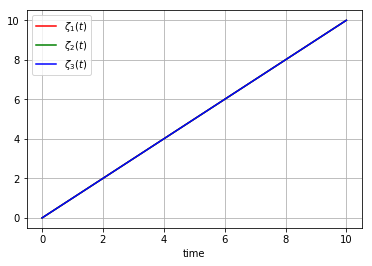

In [50]:
k = 1
m = 1
zetas = [0, 0, 0, 1, 1, 1]
t_split = np.linspace(0, 10, 500)
solution = odeint(syst_traject, zetas, t_split, args=(k, m))

plotting(t_split, solution)

__Пример 2__

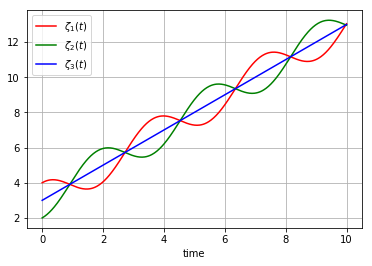

In [51]:
k = 1
m = 1
zetas = [4, 2, 3, 1, 1, 1]
t_split = np.linspace(0, 10, 500)
solution = odeint(syst_traject, zetas, t_split, args=(k, m))

plotting(t_split, solution)

__Пример 3__

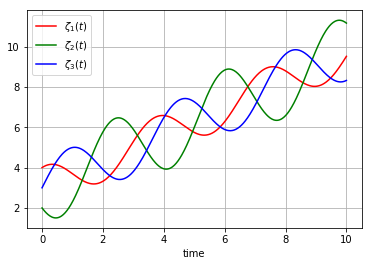

In [52]:
k = 1
m = 1
zetas = [4, 2, 3, 1, -2, 3]
t_split = np.linspace(0, 10, 500)
solution = odeint(syst_traject, zetas, t_split, args=(k, m))

plotting(t_split, solution)

__Пример 4__

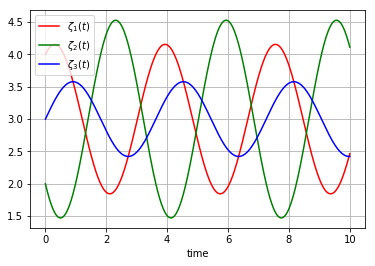

In [53]:
k = 1
m = 1
zetas = [4, 2, 3, 1, -2, 1]
t_split = np.linspace(0, 10, 500)
solution = odeint(syst_traject, zetas, t_split, args=(k, m))

plotting(t_split, solution)

__Пример 5__

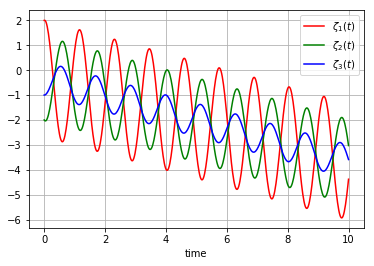

In [54]:
k = 10
m = 100
zetas = [2, -2, -1, 1, -2, 0]
t_split = np.linspace(0, 10, 500)
solution = odeint(syst_traject, zetas, t_split, args=(k, m))

plotting(t_split, solution)